In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('assessments'))))
from analyser import *
hw = Test('data/param_diff.csv')

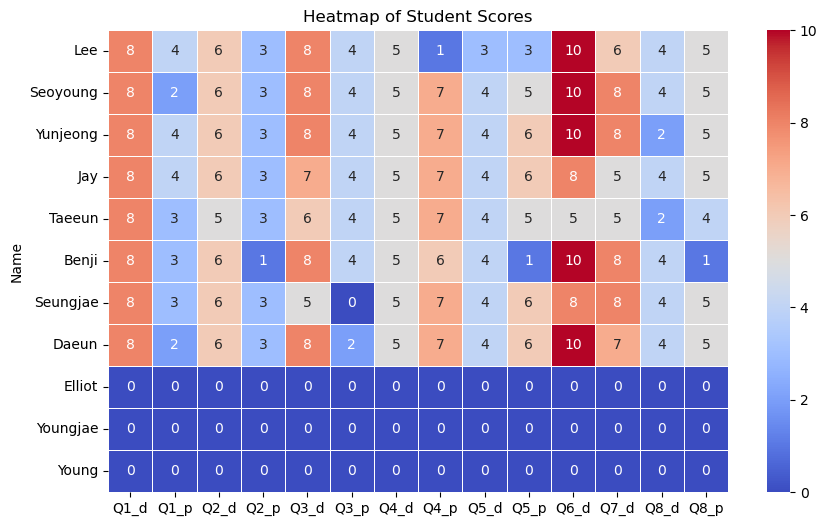

In [2]:
heatmap_data = hw.mark_table.set_index("Name")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Student Scores")
plt.show()

In [3]:
melted = hw.marks(norm=True,to_one=False)
param = melted[melted['Part'].str.contains('p',na=False)]
diff = melted[melted['Part'].str.contains('d',na=False)]
raw = hw.marks()
#total
param_r = raw[raw['Part'].str.contains('p')]
diff_r = raw[raw['Part'].str.contains('d')]

#sum
sum_param = param_r.groupby(['Name']).Mark.sum().divide(hw.available_marks[hw.available_marks['Question'].str.contains('p')].Marks_Available.sum()).reset_index()
sum_diff = diff_r.groupby(['Name']).Mark.sum().divide(hw.available_marks[hw.available_marks['Question'].str.contains('d')].Marks_Available.sum()).reset_index()

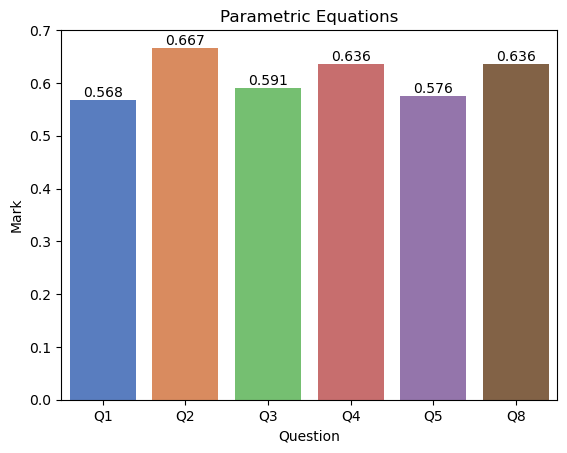

In [13]:
ax = sns.barplot(data=param,x='Question',y='Mark',hue='Question',errorbar=None,palette='muted')
ax.set_title('Parametric Equations')
for container in ax.containers:
    labels = [f'{v.get_height():.3g}' for v in container]  # Round to 3 significant figures
    ax.bar_label(container, labels=labels, fontsize=10)
plt.savefig('figures/p4_ch3.png',dpi=300)

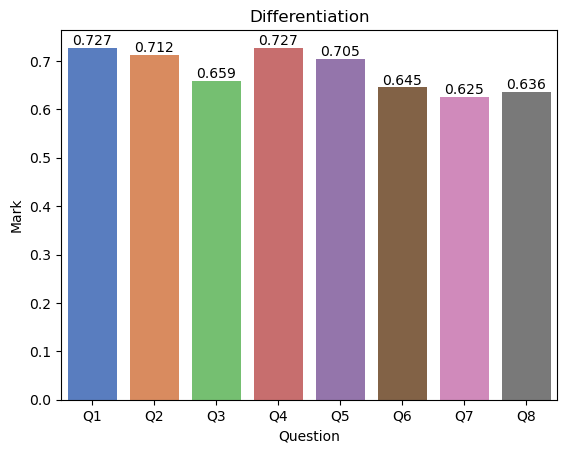

In [16]:
ax = sns.barplot(data=diff,x='Question',y='Mark',hue='Question',errorbar=None,palette='muted')
for container in ax.containers:
    labels = [f'{v.get_height():.3g}' for v in container]  # Round to 3 significant figures
    ax.bar_label(container, labels=labels, fontsize=10)
plt.title('Differentiation')
plt.savefig('figures/p4_ch5_parametric.png',dpi=300)

In [6]:
print(hw.total_marks_table[['Name','Total']])

        Name  Total
1        Lee     70
2   Seoyoung     79
3   Yunjeong     80
4        Jay     76
5     Taeeun     66
6      Benji     69
7   Seungjae     72
8      Daeun     77
9     Elliot      0
10  Youngjae      0
11     Young      0


In [7]:
print('Parametric Equations')
print(sum_param)

Parametric Equations
        Name      Mark
0      Benji  0.551724
1      Daeun  0.862069
2     Elliot  0.000000
3        Jay  1.000000
4        Lee  0.689655
5   Seoyoung  0.896552
6   Seungjae  0.827586
7     Taeeun  0.896552
8      Young  0.000000
9   Youngjae  0.000000
10  Yunjeong  1.000000


In [8]:
print('Differentiation')
print(sum_diff)

Differentiation
        Name      Mark
0      Benji  1.000000
1      Daeun  0.981132
2     Elliot  0.000000
3        Jay  0.886792
4        Lee  0.943396
5   Seoyoung  1.000000
6   Seungjae  0.905660
7     Taeeun  0.754717
8      Young  0.000000
9   Youngjae  0.000000
10  Yunjeong  0.962264


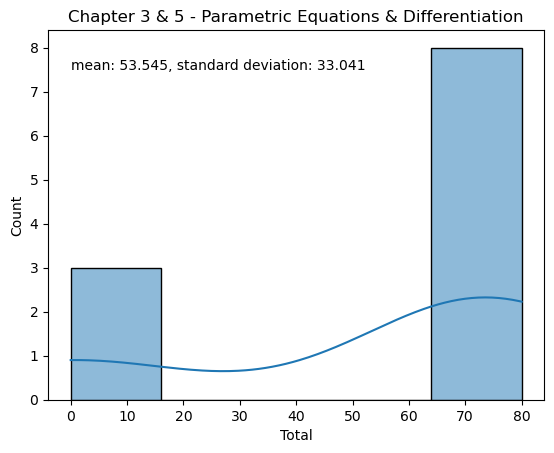

In [18]:
hist = sns.histplot(hw.total_marks_table, x = 'Total',kde=True)
data = f'mean: %.3f, standard deviation: %.3f'%(np.mean(hw.total_marks_table['Total']),np.std(hw.total_marks_table['Total']))
hist.set_title('Chapter 3 & 5 - Parametric Equations & Differentiation')
hist.annotate(data, (0,7.5))
plt.savefig('figures/Chapter 3 & 5 - Parametric Equations & Differentiation.png',dpi=300)